<a href="https://colab.research.google.com/github/MiladQolami/Mathematical-tools-for-neuroscience/blob/main/Machine_Learning/IntroToPytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

PyTorch is an open-source machine learning library for Python, primarily developed by Facebook's AI Research lab (FAIR).

Several giant tech companies like Meta and Microsoft use pytorch to bring machine learning to their products. Pytorch is #1 library for deep learning among developers. One of the main features of Pytorch is its advantages when it comes to using the power of GPUs.





In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np


# Introduction to Tensors

Tensors are fundemental data structrues in pytorch. We store infromation of input and output data in tensors. Tensors are similar to Numpy ndarrays but with additional features. So tensors can be considered as multidimensional matrices.

Tensors can have any number of dimensions and different lengths along each dimension. For example a scalar is a tensor of rank 0, a vector is a tensor of rank 1 and a matrix is a tensor with rank 2.





<center>
<img src = 'https://raw.githubusercontent.com/MiladQolami/Mathematical-tools-for-neuroscience/main/Machine_Learning/tensor.jpg'>
<center>

## Creating tensors

we can store different types of numerical data in tensors, like integers, floating numbers and complex numbers.

Lect's create some tensors.

In [2]:
t0 = torch.tensor(4)  # tensor with rank or dimension 0, ie a scalar
print(t0)
t0.ndim   # This is tensor with 0 dimension


tensor(4)


0

In [3]:
t1 = torch.tensor([1.0,2.3,3.6])  # A 1D tensor, a vecrot
print(t1)
t1.ndim

tensor([1.0000, 2.3000, 3.6000])


1

In [4]:
t2 = torch.tensor([[1,2,3],
                   [4,5,6]])   # A 2D tensor or a matrix
print(t2)
t2.ndim

tensor([[1, 2, 3],
        [4, 5, 6]])


2

### Tensor's data type

We can change tensor's data type by passing an optional argument

In [5]:
t2.dtype # t2 is tensor containg integers

torch.int64

In [6]:
t2 = torch.tensor([[1,2,3],
                   [4,5,6]],dtype =torch.float16)

In [7]:
t2.dtype

torch.float16

### Shape of a tensor

We can get number of rows and columns by `.shape` method

In [8]:
t2.shape # A 2D tensor with 2 rows and 3 columns

torch.Size([2, 3])

### Initializing a tensor

Similar to Numpy arrays we can initialize a tensors with zeros, ones, random values, ...

In [9]:
zero_tensor = torch.zeros(2,5)  # A tensor with 2 rows and 5 columns with zeros
print(zero_tensor)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [10]:
range_tensor = torch.arange(0,10,2)  # A tensor with values 0,2,4,6,8,10
print(range_tensor)

tensor([0, 2, 4, 6, 8])


Let's go to higher dimensions


In [11]:
t3 = torch.tensor([[[1,3,3],
                    [2,5,3],
                    [6,2,3]]])  # A 3D tensor or a cube, columns are in depth
print(t3)
t3.ndim


tensor([[[1, 3, 3],
         [2, 5, 3],
         [6, 2, 3]]])


3

In [12]:
t3.shape  # A 3D tensor with 1 row, 3 columns and 3 depth

torch.Size([1, 3, 3])

Let's create a tensor with shape (2,3,2)

In [13]:
t3_2 = torch.tensor([[[1,3],
                      [3,5],
                      [6,4]],

                     [[3,4],
                      [1,3],
                      [4,3]]])  # A 3D tensor with 2 rows, 3 columns and 2 depth
print(t3_2)

tensor([[[1, 3],
         [3, 5],
         [6, 4]],

        [[3, 4],
         [1, 3],
         [4, 3]]])


In [14]:
t3_2.shape

torch.Size([2, 3, 2])

In [15]:
# Exercise: Generate a tensor with 3 rows, 2 columns and 2 depth
my_tensor = ...
print(my_tensor)
print(my_tensor.shape)

Ellipsis


AttributeError: 'ellipsis' object has no attribute 'shape'

## Reductions Operations

In [ ]:
# Creating a tensor
a_tensor = torch.arange(start=0,end=20,step=2)

# Some frequently used data summary statistics
a_tensor.min(),a_tensor.max(),a_tensor.sum()

In [ ]:
a_tensor.dtype

`mean()` does not work when data type is too long or it is integer. To make it work we should change data type to a shorter data type

In [ ]:
a_tensor.type(torch.float32).mean()

### Finding positional min and max

In [ ]:
a_tensor.argmin()  # Returns index of minimum value
a_tensor.argmax()  # Returns index of maximum value

### Random tensors

Random tensors are important becuase in deep neural networks we start by setting weights to random values and then try to optimize those weieghts.

`start with random values ==> look at your data ==> update your weights ==> look at your dagta ==> updata your weights`

In [ ]:
rand_tensor = torch.rand(3,4)  # A tensor with random values
print(rand_tensor)

To reproduce the result when random processes is involved we usually seed the RNG.


In [ ]:
torch.manual_seed(100)
torch.rand(3)

### Tensor Manipulatoin


Indexing, similar to numpy, allows for accessing elements in a tensor through their indices. In any numpy-like array, indexing starts at 0, and when specifying ranges, it includes the starting index up to, but not including, the ending index. Additionally, negative indices can be used to refer to elements relative to the end of the list. This method of accessing elements is often called slicing.

For instance, using the index [-1] will access the last element. The slice [1:3] captures the second and third elements. Furthermore, the slice [:-2] selects all elements up to, but excluding, the last two elements.

In [ ]:
arr = np.array([10, 20, 30, 40, 50])
last_element = arr[-1]  # Outputs 50

specific_elements = arr[1:3]  # Outputs [20, 30]


all_but_last_two = arr[:-2]  # Outputs [10, 20, 30]


**Reshaping** tensors involves changing the structure of the data. Often, there's a need to convert 2D data into a 1D format or vice versa. To facilitate these transformations, the methods .flatten() and .reshape() are used.

For instance:

Flatten a 2D tensor into a 1D tensor:

In [ ]:
tensor_2d = torch.tensor([[1, 2], [3, 4]])
flattened_tensor = tensor_2d.flatten()  # Outputs: tensor([1, 2, 3, 4])


Reshape a 1D tensor into a 2D tensor:

In [ ]:
tensor_1d = torch.tensor([1, 2, 3, 4])
reshaped_tensor = tensor_1d.reshape(2, 2)  # Outputs: tensor([[1, 2], [3, 4]])


**Squeezing tensors**

In [ ]:
tonsor_2d = torch.ones(1,5) # A 2D tensor with a single row
tensor_1 = torch.tensor([1,1,1,1,1]) # A 1D tensor with a single row

tensor_2d_to_1d = tonsor_2d.squeeze(0)
print(tensor_2d_to_1d.ndim)

**Swapping Dimesions**

Sometimes we need to swap dimensions so that our data is in correct form.It is similar to `.transpose` but in higher dimensions.


In [ ]:
my_image = torch.randn(3,254,128)

my_image_prime = my_image.permute(2,1,0)

plt.imshow(my_image_prime)

### Moving between CPU & GPU

Data can be stored on both the CPU and GPU, but utilizing the GPU for data processing can speed up operations, especially for tasks involving large-scale matrix calculations or deep learning.


Moving data between CPU and GPU can be time-consuming. It’s best to minimize these transfers by keeping data on the GPU as much as possible once it’s been loaded there.



In [ ]:
x = torch.tensor([1,2,3])
x.device  # CPU

In [ ]:
# Moving the variabl x to GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
x = x.to(device)
x.device

It is wise to make sure the defaut device is GPU if available at the begining of the code.

In [ ]:
def set_device():
    device = "cuda" if torch.cuda.is_available() else "cpu"
    return device

## Data Loading and Preprocessing

One of the essential steps in building models is preparing and loading data efficiently. PyTorch provides robust utilities for handling data, including custom datasets and data loaders that can manage batching, shuffling, and parallel loading.

**But why proper data loading is essential?**

* **Performance**: Proper data handling ensures that the GPU is fed with data without delays, preventing bottlenecks.
* **Scalability**: As datasets grow, efficient loading mechanisms become vital.
* **Preprocessing**: Applying transformations and augmentations can improve model performance.

In this section, we'll explore how to load and preprocess data using PyTorch's `Dataset` and `DataLoader` classes. We'll work through a real example using the popular MNIST dataset of handwritten digits.

In [16]:
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

* What is `torch.utils.data.Dataset`?

`Dataset` is an abstract class that represents a dataset. It serves as a blueprint for creating custom datasets.

Purpose:

To allow users to create their own datasets by subclassing `Dataset`.

When you have custom data (e.g., images in a folder, data from a database, etc.), you can create a class that inherits from Dataset and implements the necessary methods.


* What is `torch.utils.data.DataLoader`?

`DataLoader` is a PyTorch class that provides an iterable over a dataset with support for automatic batching, shuffling, and loading data in parallel using multiprocessing workers.

Purpose:

To facilitate the efficient loading of data during training and evaluation of models.
Handles batching of data samples, which is essential for training neural networks in mini-batches.
Supports shuffling of data to improve model generalization.
Can load data in parallel, which speeds up data preparation.

Usage:

Wrap a Dataset (either a built-in dataset or a custom one) with a DataLoader to create an iterable over the data.

* What is `torchvision.transforms`?

`ttransforms` is a module that provides common image transformations for preprocessing and data augmentation.

Purpose:

To transform PIL images (from the Python Imaging Library) or tensors into a desired format or apply data augmentation techniques.
Helps in normalizing data, converting images to tensors, resizing, cropping, flipping, rotating, etc.

Usage:

Create a composition of transformations using transforms.Compose.
Apply transformations when loading datasets to preprocess or augment the data.


### Step 1: Define Transformations

We can define a series of transformations to apply to the data, such as converting images to tensors and normalizing pixel values.

In [17]:
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize with mean and std of MNIST
])


### Step 2: Download and load the dataset

In [18]:
trainDataset = datasets.MNIST(
    root= '/content',
    train= True,
    download=True,
    transform=transform
)


testDataset = datasets.MNIST(
    root= '/content',
    train= False,
    download=True,
    transform=transform
)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:00<00:00, 75125739.71it/s]


Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 17138609.77it/s]

Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw



Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 50970198.60it/s]


Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 3446811.79it/s]

Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw



### Step 3: Create Data Loaders
Data loaders handle batching, shuffling, and loading data in parallel using multiprocessing workers.

In [19]:
trainLoader = DataLoader(
    dataset=trainDataset,
    batch_size=64,
    shuffle=True
)

testLoader = DataLoader(
    dataset=testDataset,
    batch_size=64,
    shuffle=False
)


### Step 4: Explore the Data

Let's visualize some images to understand what we're working with.

In [20]:
examples = enumerate(trainLoader)
batchNumber,(exampleData,exampleTargets) = next(examples) # exampleData contains all data in each batch
                                                          # exampleTargets is labels of datapoints in each batch

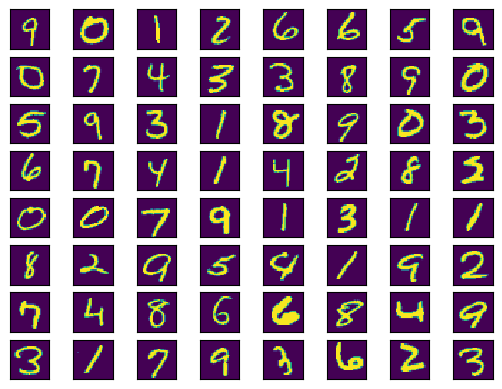

In [22]:
fig = plt.figure()
for i in range(exampleData.size(0)):

  plt.subplot(8,8,i+1)
  plt.imshow(exampleData[i][0],interpolation='none')
  plt.xticks([])
  plt.yticks([])


plt.show()

